In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_tr = r'C:\Users\dsa7\Desktop\Data Analytics\titanic\train.csv'
path_te = r'C:\Users\dsa7\Desktop\Data Analytics\titanic\test.csv'
train_df = pd.read_csv(path_tr)
test_df = pd.read_csv(path_te)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


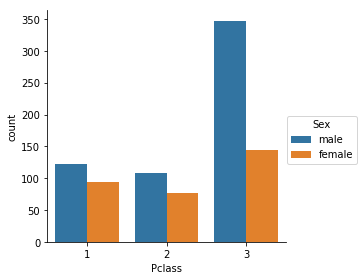

In [3]:
_ = sns.factorplot('Pclass', data=train_df, hue='Sex', kind="count")

In [4]:
def normal_fare(passenger):
    sibsp, parch, fare = passenger
    normal_fare  = fare / (sibsp + parch + 1)
    return normal_fare
train_df['NormalFare'] = train_df[['SibSp', 'Parch', 'Fare']].apply(normal_fare, axis = 1)
test_df['NormalFare'] = test_df[['SibSp', 'Parch', 'Fare']].apply(normal_fare, axis = 1)
train_df.NormalFare.describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: NormalFare, dtype: float64

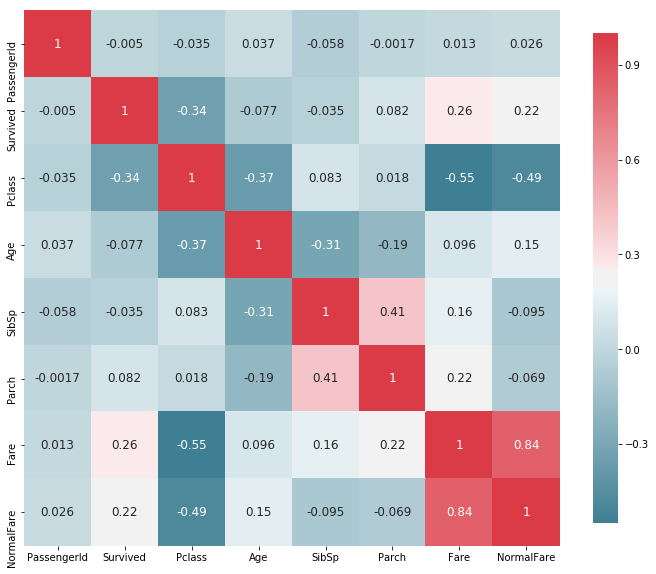

In [5]:
def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(train_df)

Normalizing the Fare makes it slightly better indicator because it reduces the correlation with PClass. This allows for this variable to be a slightly more independent variable than the normal rate did. The above code was obtained from https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial 

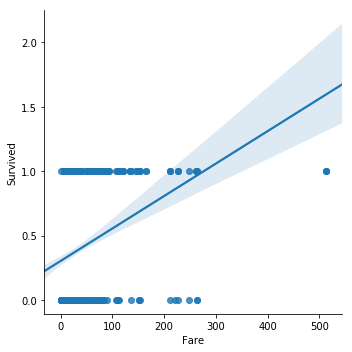

In [6]:
_ = sns.lmplot('Fare','Survived', data=train_df)

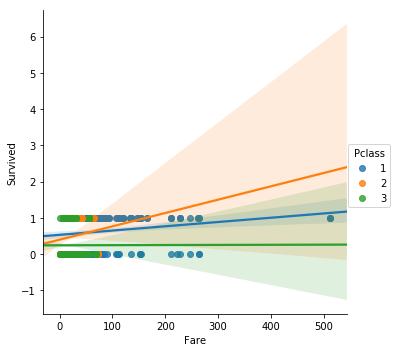

In [7]:
_ = sns.lmplot('Fare','Survived', hue='Pclass', data=train_df)

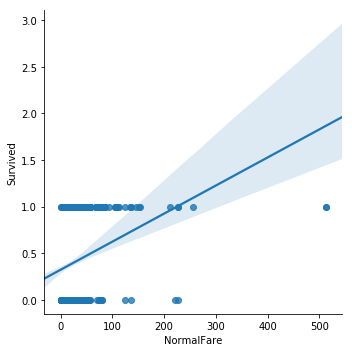

In [8]:
_ = sns.lmplot('NormalFare','Survived', data=train_df)

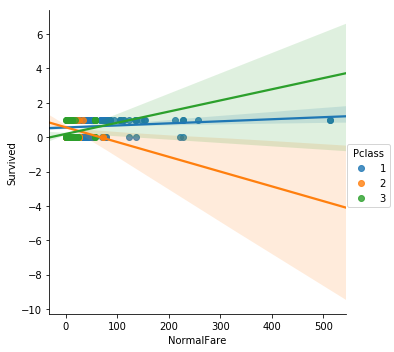

In [9]:
_ = sns.lmplot('NormalFare','Survived', hue='Pclass', data=train_df)

In [10]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.NormalFare = df.NormalFare.fillna(-0.5)
    bins = (-1, 0, 7.25, 8.3, 23.6, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.NormalFare, bins, labels=group_names)
    df.NormalFare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df 

def company_feat(df):
    df['Company'] = df.Parch + df.SibSp
    return df

def alone_feat(df):
    df['Alone'] = df['Company'] == 0
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Fare'], axis=1)

def embarked_cat(df):
    df.Embarked = categories
    return df

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = company_feat(df)
    df = alone_feat(df)
    df = drop_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone
0,1,0,3,male,Young Adult,1,0,N,S,1_quartile,"Braund,",Mr.,1,False
1,2,1,1,female,Adult,1,0,C,C,4_quartile,"Cumings,",Mrs.,1,False
2,3,1,3,female,Young Adult,0,0,N,S,2_quartile,"Heikkinen,",Miss.,0,True
3,4,1,1,female,Young Adult,1,0,C,S,4_quartile,"Futrelle,",Mrs.,1,False
4,5,0,3,male,Young Adult,0,0,N,S,2_quartile,"Allen,",Mr.,0,True


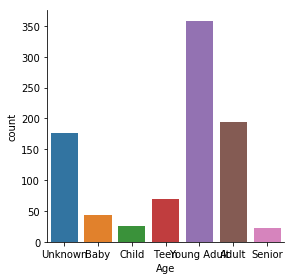

In [11]:
_ = sns.factorplot('Age', data=train_df, kind="count")

Obtained above functions from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish. Changed the bin sizes for both the Age bins (removed Student) and the bins for Fare in order conform to the quartiles of our new variable, NormalFare.

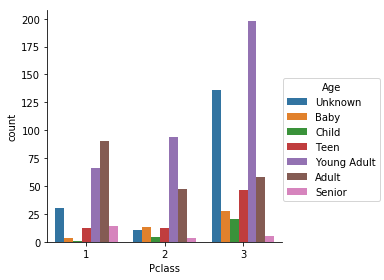

In [12]:
_ = sns.factorplot('Pclass', data=train_df, hue='Age', kind="count")

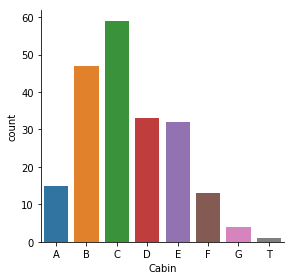

In [13]:
_ = sns.factorplot('Cabin', data=train_df, kind="count", order=['A','B','C','D','E','F','G','T'])

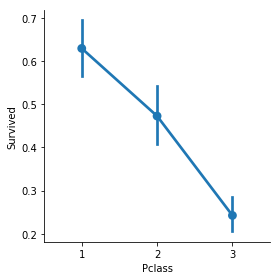

In [14]:
_ = sns.factorplot('Pclass','Survived', data=train_df)

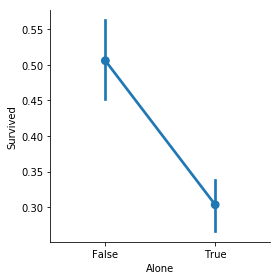

In [15]:
_ = sns.factorplot('Alone','Survived', data=train_df)

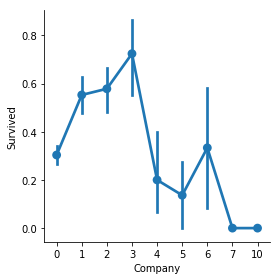

In [16]:
_ = sns.factorplot('Company','Survived', data=train_df)

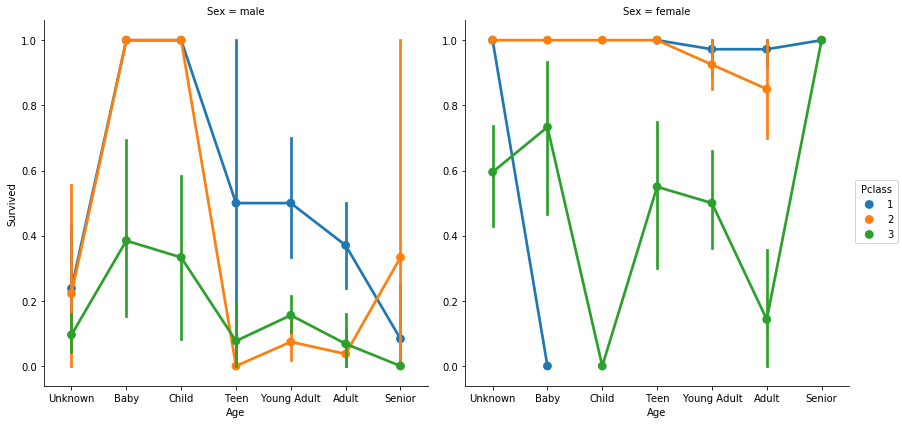

In [17]:
_ = sns.factorplot('Age','Survived', hue='Pclass', col='Sex', data=train_df, size=6, aspect=1)

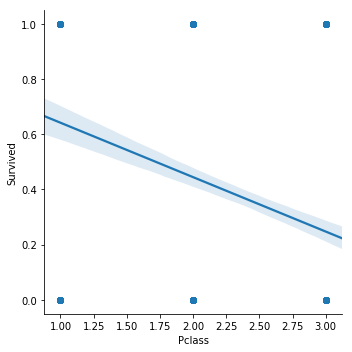

In [18]:
_ = sns.lmplot('Pclass','Survived', data=train_df)

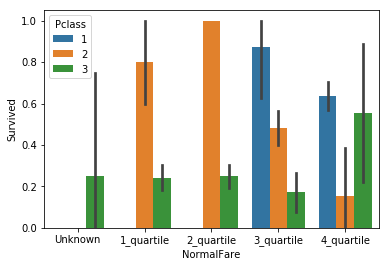

In [19]:
sns.barplot(x="NormalFare", y="Survived", hue="Pclass", data=train_df);

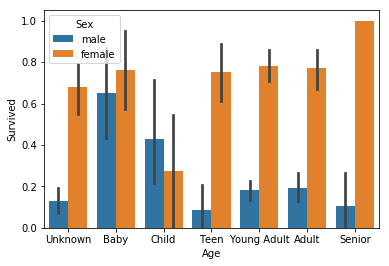

In [20]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train_df);

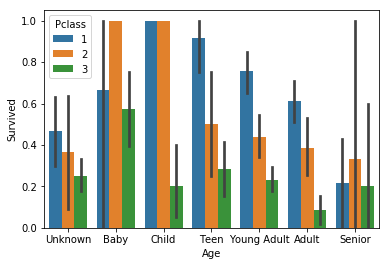

In [21]:
sns.barplot(x="Age", y="Survived", hue="Pclass", data=train_df);

Obtained barplots from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish 

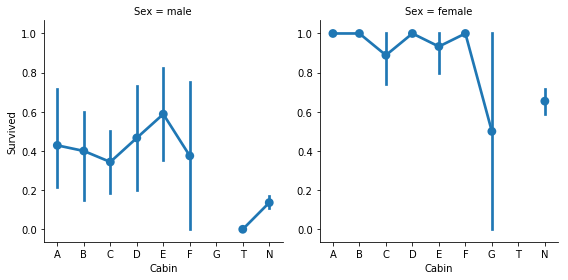

In [22]:
_ = sns.factorplot('Cabin','Survived', order=['A','B','C','D','E','F','G','T','N'], data=train_df, col='Sex')

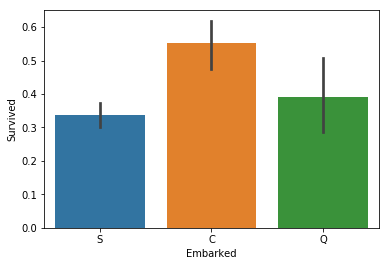

In [37]:
sns.barplot(x="Embarked", y="Survived", data=train_df);

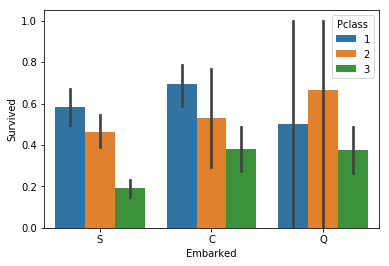

In [38]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train_df);

In [23]:
from sklearn import preprocessing
def encode_features(train_df, test_df):
    features = ['NormalFare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix', 'Alone', 'Company']
    df_combined = pd.concat([train_df[features], test_df[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        train_df[feature] = le.transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    return train_df, test_df
    
data_train, data_test = encode_features(train_df, test_df)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone
0,1,0,3,1,6,1,0,7,S,0,100,19,1,0
1,2,1,1,0,0,1,0,2,C,3,182,20,1,0
2,3,1,3,0,6,0,0,7,S,1,329,16,0,1
3,4,1,1,0,6,1,0,2,S,3,267,20,1,0
4,5,0,3,1,6,0,0,7,S,1,15,19,0,1


Incorperated above code from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish. Fit it to match the variables that we created in our dataset.

In [24]:
embarked = pd.DataFrame()
embarked[ 'Embarked' ] = data_train.Embarked.fillna( 'S' )
embarked[ 'Embarked' ] = embarked[ 'Embarked' ].map( lambda c : c[0] )
embarked = pd.get_dummies( embarked['Embarked'] , prefix = 'Embarked' )

data_train = pd.merge(data_train, embarked, left_index=True, right_index=True, how='outer')
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,6,1,0,7,S,0,100,19,1,0,0,0,1
1,2,1,1,0,0,1,0,2,C,3,182,20,1,0,1,0,0
2,3,1,3,0,6,0,0,7,S,1,329,16,0,1,0,0,1
3,4,1,1,0,6,1,0,2,S,3,267,20,1,0,0,0,1
4,5,0,3,1,6,0,0,7,S,1,15,19,0,1,0,0,1


In [25]:
embarked = pd.DataFrame()
embarked[ 'Embarked' ] = data_test.Embarked.fillna( 'S' )
embarked[ 'Embarked' ] = embarked[ 'Embarked' ].map( lambda c : c[0] )
embarked = pd.get_dummies( embarked['Embarked'] , prefix = 'Embarked' )

data_test = pd.merge(data_test, embarked, left_index=True, right_index=True, how='outer')
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,6,0,0,7,Q,1,401,19,0,1,0,1,0
1,893,3,0,0,1,0,7,S,0,843,20,1,0,0,0,1
2,894,2,1,3,0,0,7,Q,2,552,19,0,1,0,1,0
3,895,3,1,6,0,0,7,S,2,851,19,0,1,0,0,1
4,896,3,0,6,1,1,7,S,0,342,20,2,0,0,0,1


Above code incorporated from https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial . 

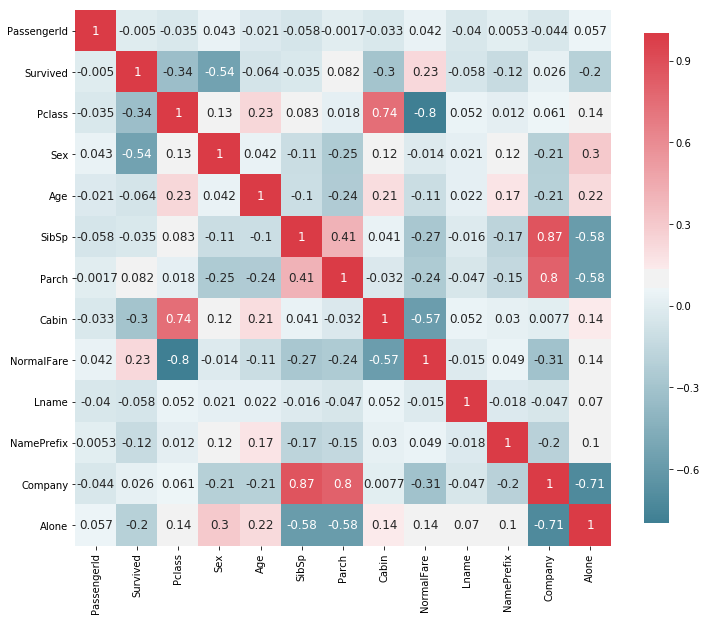

In [33]:
plot_correlation_map(data_train)plot_correlation_map(train_df)

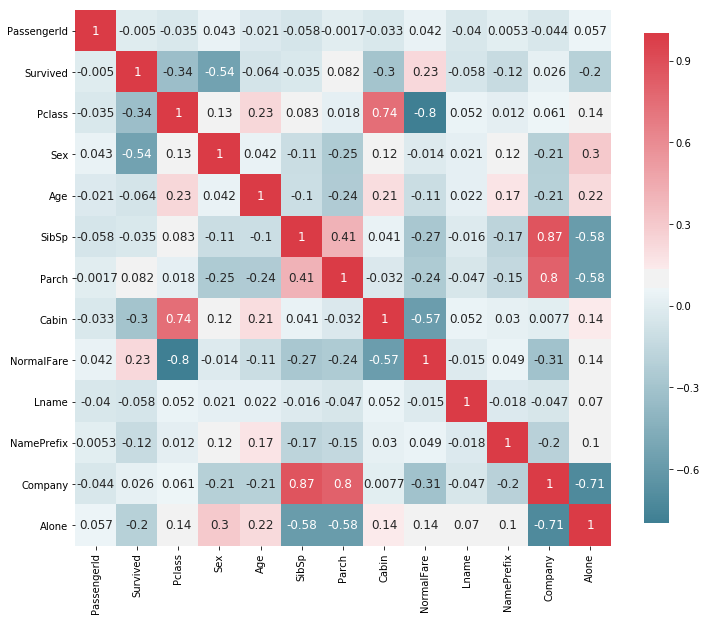

In [34]:
plot_correlation_map(data_test)

Maps incorporated from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish to fit variables in our dataset. 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [68]:
features = ['Pclass', 'Company',  'Alone', 'Sex', 'Age', 'NormalFare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin']
X_train = data_train[features]
y_train = train_df['Survived']
X_test = data_test[features]

inputs = X_train, y_train, X_test

Decided to drop Parch and SibSp variables since they are highly correlated with Company and Alone. 

In [69]:
def models():
    return [LogisticRegression(),
            SVC(),
            LinearSVC(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            DecisionTreeClassifier()]

def name(model):
    return model.__class__.__name__

In [70]:
def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=False)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

def predict_and_score(model, inputs):
    X, y, X_test = inputs
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return y_pred, model.score(X, y)


table = {name(m): predict_and_score(m, inputs) for m in models()}
model = best_model(table)

DecisionTreeClassifier    0.904602
RandomForestClassifier    0.900112
KNeighborsClassifier      0.846240
SVC                       0.839506
LogisticRegression        0.811448
LinearSVC                 0.806958
GaussianNB                0.777778
dtype: float64


In [71]:
write_submission(table[model][0], 'submission.csv')

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
def predict_and_cv_score(model, inputs):
    X, y, X_test = inputs
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    model.fit(X, y)
    return model.predict(X_test), score


table = {name(m): predict_and_cv_score(m, inputs) for m in models()}
model = best_model(table)

SVC                       0.826051
LogisticRegression        0.808110
DecisionTreeClassifier    0.805863
LinearSVC                 0.802479
RandomForestClassifier    0.799209
KNeighborsClassifier      0.795926
GaussianNB                0.764616
dtype: float64
